<h1 style = "color : Brown">ASSIGNMENT - 2 </h1>

### I. Importing and Understanding the data

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression


In [4]:
# Importing Day.csv
bike_rental = pd.read_csv(r"C:\Users\advait\Downloads\day.csv")

In [5]:
# Looking at the first five rows
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# checking total rows and column
bike_rental.shape

(730, 16)

In [7]:
# checking for null values and datatypes
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#to include categorical columns
bike_rental.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,10-12-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


In [9]:
#dropping instant column
bike_rental.drop('instant', axis = 1, inplace = True)

In [10]:
# checking values count before maping variable
bike_rental['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
bike_rental['weathersit'].value_counts()
#discrepancy with data dictionary which mentioned 1-4

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
bike_rental['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [13]:
bike_rental['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [14]:
# defining function to map the values for these columns; to convert int to categorical variables

def as_seasons(x):
    return x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

def as_weathersit(x):
    return x.map({1:'Clear, Few clouds', 2:'Mist + Cloudy', 3:'Light Snow/Rain + Thunderstorm'})

def as_mnth(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

def as_weekday(x):
    return x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

def as_yr(x):
    return x.map({0:'2018', 1:'2019'})

def as_holiday(x):
    return x.map({0:'No', 1:'Yes'})

def as_workingday(x):
    return x.map({0:'No', 1:'Yes'})


In [15]:
# using the functions to replace the values
bike_rental[['season']] = bike_rental[['season']].apply(as_seasons)
bike_rental[['weathersit']] = bike_rental[['weathersit']].apply(as_weathersit)
bike_rental[['mnth']] = bike_rental[['mnth']].apply(as_mnth)
bike_rental[['weekday']] = bike_rental[['weekday']].apply(as_weekday)
bike_rental[['yr']] = bike_rental[['yr']].apply(as_yr)
bike_rental[['holiday']] = bike_rental[['holiday']].apply(as_holiday)
bike_rental[['workingday']] = bike_rental[['workingday']].apply(as_workingday)

In [16]:
#verifying the updated values
bike_rental['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [17]:
bike_rental['weathersit'].value_counts()

Clear, Few clouds                 463
Mist + Cloudy                     246
Light Snow/Rain + Thunderstorm     21
Name: weathersit, dtype: int64

In [18]:
bike_rental['mnth'].value_counts()

Mar    62
Dec    62
Aug    62
May    62
Jul    62
Jan    62
Oct    62
Apr    60
Nov    60
Jun    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [19]:
bike_rental['weekday'].value_counts()

Tue    105
Mon    105
Sun    104
Sat    104
Thu    104
Wed    104
Fri    104
Name: weekday, dtype: int64

### II. Data Visualization

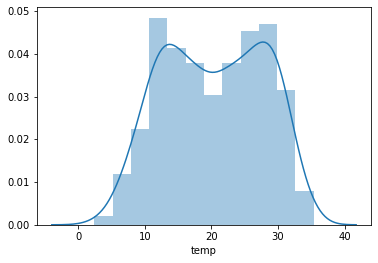

########################################################


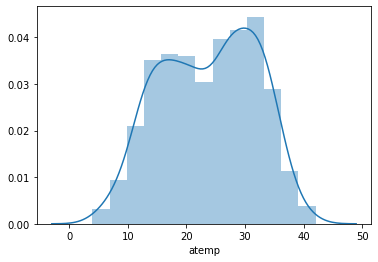

########################################################


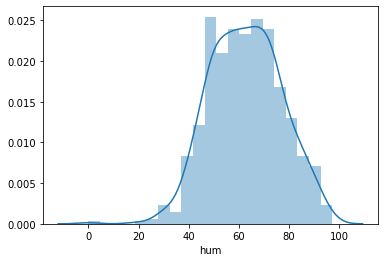

########################################################


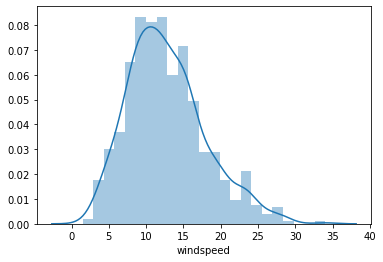

########################################################


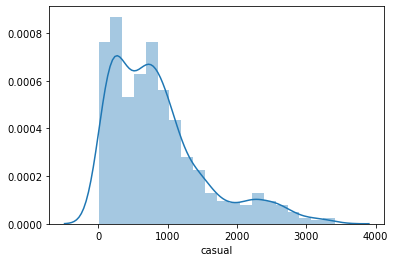

########################################################


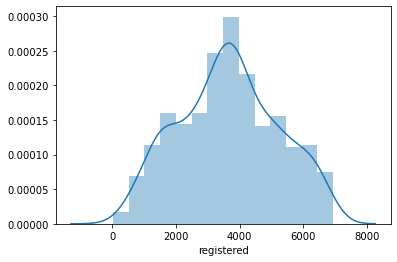

########################################################


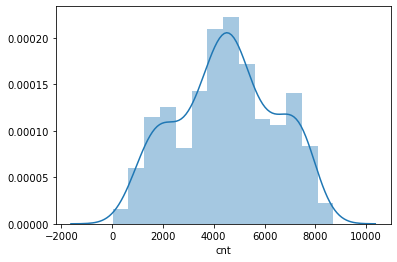

########################################################


In [20]:
# plotting graph to observe patterns and visualize the data
x = list(bike_rental.describe().columns)

for i in x:
    sns.distplot(bike_rental[i])
    plt.show();
    print('########################################################')



In [21]:
# to extract categorical variables
bike_rental['dteday'] = bike_rental['dteday'].astype('datetime64')
bike_rental_categ = bike_rental.select_dtypes(exclude=['float64','int64','datetime64'])
bike_rental_categ.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

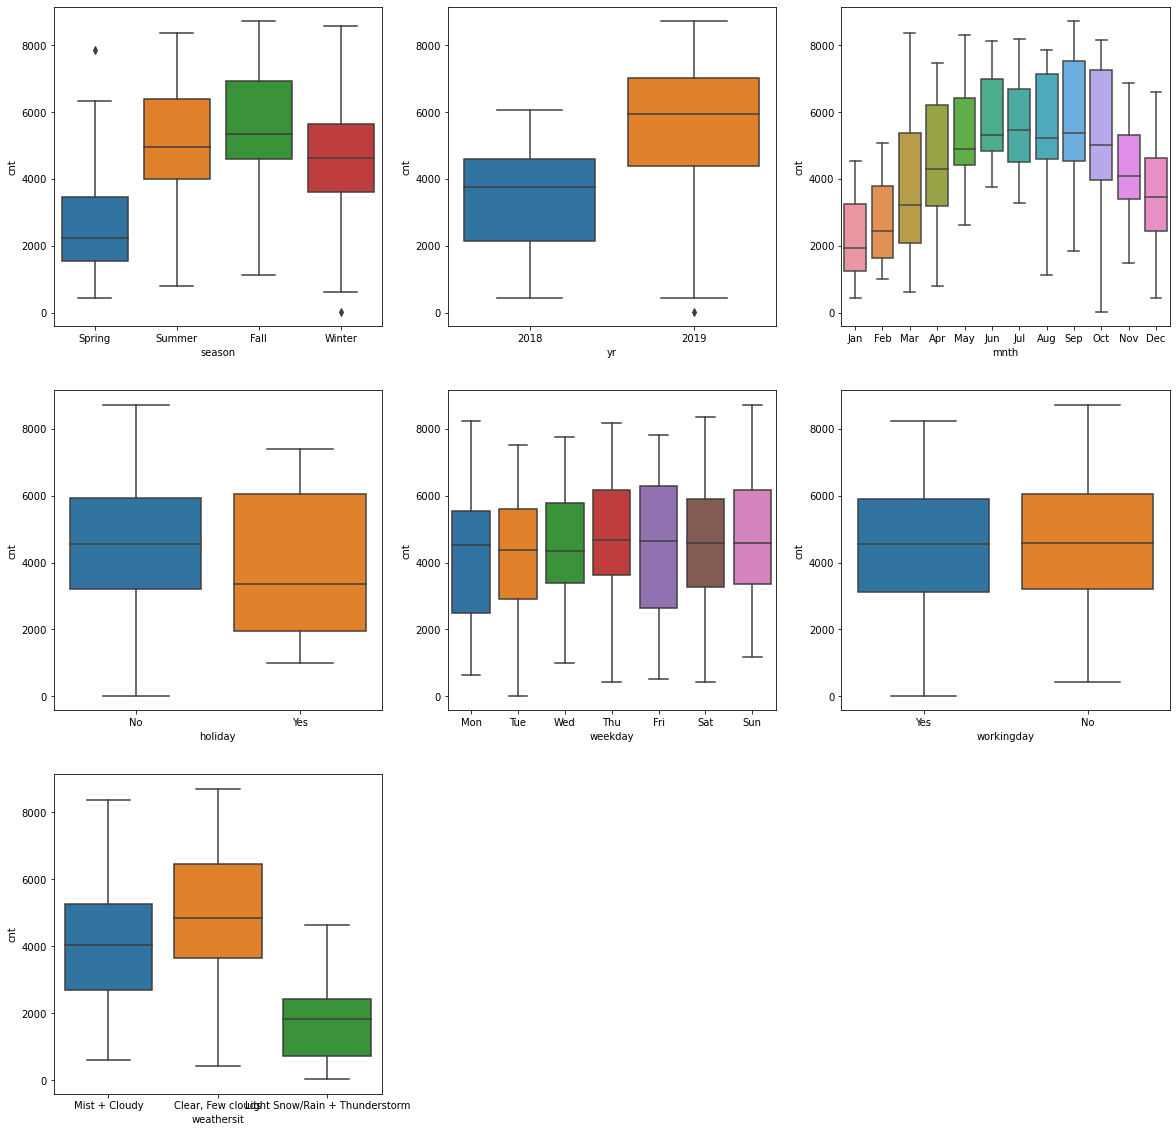

In [22]:
#visualize categorical variables
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data = bike_rental)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data = bike_rental)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data = bike_rental)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data = bike_rental)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data = bike_rental)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data = bike_rental)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data = bike_rental)

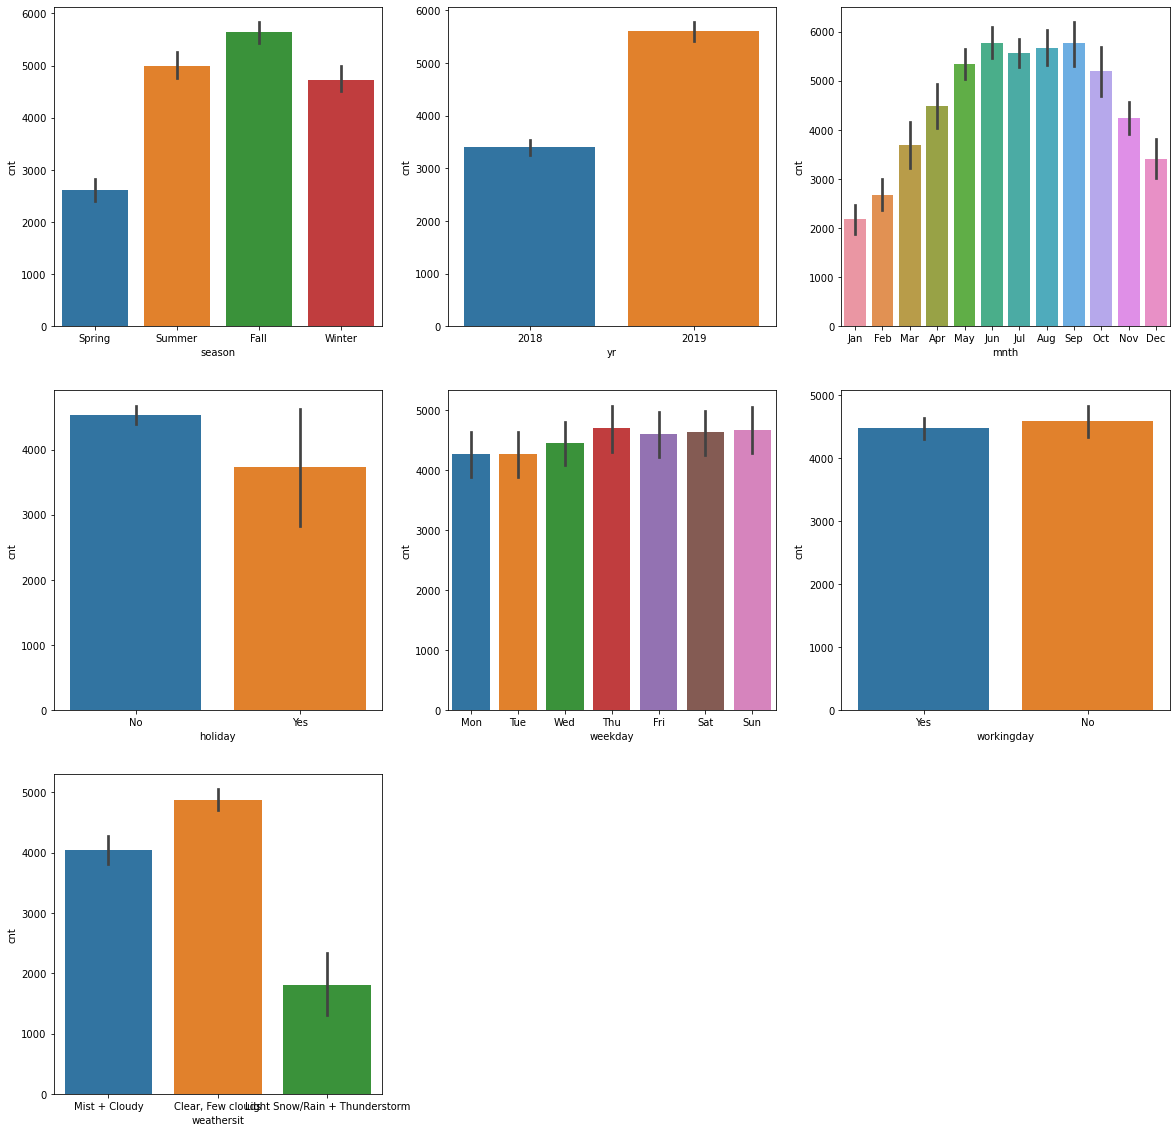

In [23]:
# using bar plot to visualize
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot(x = 'season', y = 'cnt', data = bike_rental)
plt.subplot(3,3,2)
sns.barplot(x = 'yr', y = 'cnt', data = bike_rental)
plt.subplot(3,3,3)
sns.barplot(x = 'mnth', y = 'cnt', data = bike_rental)
plt.subplot(3,3,4)
sns.barplot(x = 'holiday', y = 'cnt', data = bike_rental)
plt.subplot(3,3,5)
sns.barplot(x = 'weekday', y = 'cnt', data = bike_rental)
plt.subplot(3,3,6)
sns.barplot(x = 'workingday', y = 'cnt', data = bike_rental)
plt.subplot(3,3,7)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike_rental)


In [24]:
#extract numeric variable
bike_rental_num = bike_rental.select_dtypes(exclude=['object','datetime64'])

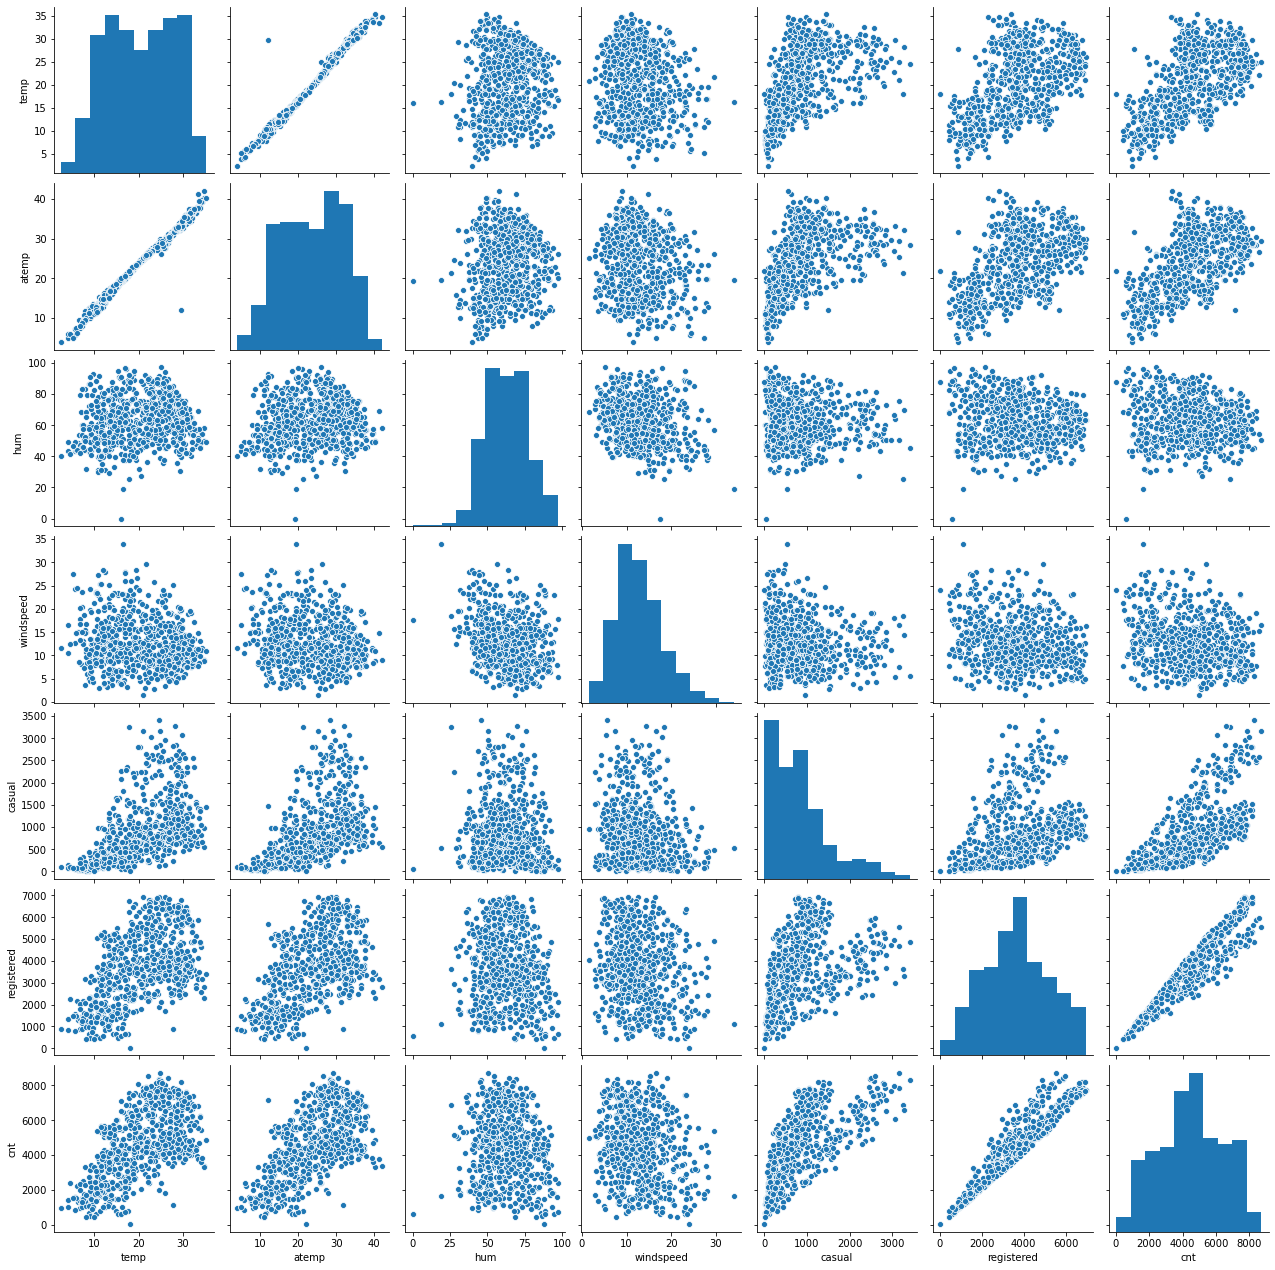

In [25]:
#visualizing numericvariables
sns.pairplot(bike_rental_num)

In [26]:
#correlation matrix
bike_rental_num_cor = bike_rental_num.corr()
bike_rental_num_cor
#temp and atemp are too correlated# can drop cas and reg later #cnt being correlated is good others are not

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


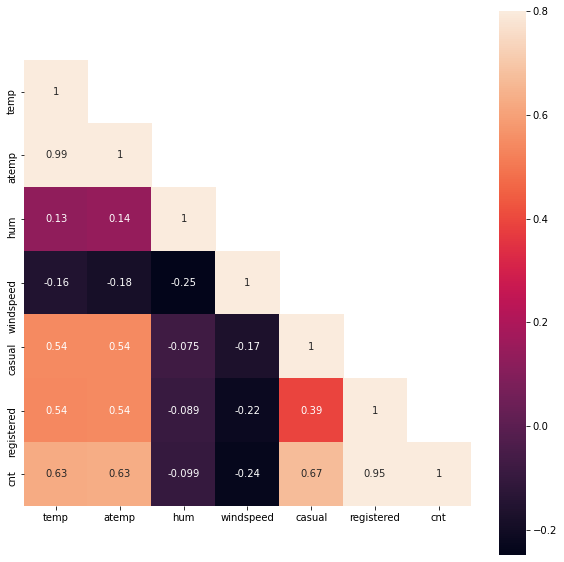

In [27]:
#using heatmap to better visualize the correlation between numeric variables; with masking redundant information
mask = np.array(bike_rental_num_cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)    
sns.heatmap(bike_rental_num_cor,annot = True, mask=mask, vmax = 0.8, square = True)



In [28]:
bike_rental.drop('atemp', axis =1, inplace=True )#too correlated

In [29]:
bike_rental.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

### III. Data Preparation

In [30]:
#using dummy variables for season, mnth, weathersit, weekday, holiday, yr, workingday
bike_rental_dum = pd.get_dummies(bike_rental_categ, drop_first=True)
bike_rental_dum.head()

,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow/Rain + Thunderstorm,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
#since we will concatenate these values in the original dataset we can remove the corresponding columns to remove redundancy of data
bike_rental = bike_rental.drop(list(bike_rental_categ), axis =1)

In [32]:
bike_rental.columns

Index(['dteday', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [33]:
# Add the results of the dummy variabels columns to the original bike_rental dataframe
bike_rental = pd.concat([bike_rental,bike_rental_dum],axis =1)

In [34]:
bike_rental.head()

,dteday,temp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow/Rain + Thunderstorm,weathersit_Mist + Cloudy
0,2018-01-01,14.110847,80.5833,10.749882,331,654,985,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2018-02-01,14.902598,69.6087,16.652113,131,670,801,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,2018-03-01,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2018-04-01,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2018-05-01,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
#since our target variable is cnt which was derived from casual and registered, we can drop casual and registered.
#we can also drop dteday as the date is on a very small scale and therefore changing everyday.
bike_rental = bike_rental.drop(['registered', 'casual', 'dteday'], axis =1)

In [36]:
bike_rental.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'workingday_Yes', 'weathersit_Light Snow/Rain + Thunderstorm',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [37]:
len(bike_rental)

730

### IV. Splitting the Data into Training and Testing Sets

In [38]:
X = bike_rental.drop('cnt',axis =1)
y = bike_rental.cnt

In [39]:
X.shape

(730, 28)

In [40]:
y.shape

(730,)

In [41]:
# We specify this so that the train and test data set always have the same rows, respectively.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [42]:
X_train.shape

(511, 28)

In [43]:
X_test.shape

(219, 28)

In [44]:
#verifying number of rows are still the same
584+146

730

### Scaling

In [45]:
#rescaling the features using min-max method as humidity and other variables won't make sense having -ve value
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
num_vars = ['temp', 'hum', 'windspeed']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train[num_vars].head()

,temp,hum,windspeed
653,-0.121991,-0.514975,-0.118309
576,1.232298,0.517177,-0.331370
426,-0.421405,-0.069675,-0.386500
728,-1.296629,-1.045794,2.019569
482,-0.628694,-1.001559,-0.781062


In [47]:
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
X_test[num_vars].head()

,temp,hum,windspeed
184,1.170175,0.126863,-1.435825
535,1.468552,-0.190908,-1.000254
299,-0.201477,1.340150,0.130692
221,1.383939,-1.355081,0.164303
152,1.107825,-2.181274,1.404071


## V. Building a linear model


In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#fitting the model using the train values
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
regressor.coef_

array([  862.44277206,  -200.50595782,  -268.8924545 ,  -351.41407193,
         404.22428888,   977.31245972,  2012.79034378,   238.92649555,
        -383.42005896,  -324.55901617,  -557.90905278,  -245.51110896,
          73.75829417,     7.9027703 ,   216.44071369,  -340.91177668,
          75.15400321,   792.99599284, -1170.52384625,  -215.82760299,
        -474.46138129,  -420.30329795,    34.99077129,  -228.20876733,
         -76.06946514,  -511.1162395 , -2179.45429645,  -505.18527379])

In [50]:
#checking coefficient of every dependent variable
coeff_bike_rental = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_bike_rental

,Coefficient
temp,862.442772
hum,-200.505958
windspeed,-268.892455
season_Spring,-351.414072
season_Summer,404.224289
season_Winter,977.312460
yr_2019,2012.790344
mnth_Aug,238.926496
mnth_Dec,-383.420059
mnth_Feb,-324.559016


In [51]:
regressor.intercept_

4067.66476400737

In [52]:
# Making  predictions
y_pred = regressor.predict(X_test)

In [53]:
#comparing values of the actual values and the values predicted by the model 
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df.head()

,Actual,Predicted
184,6043,3440.229727
535,6211,7656.092727
299,2659,3662.872073
221,4780,5216.564792
152,4968,5086.436243


In [54]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 598.7642322216104
Mean Squared Error: 634686.8355969192
Root Mean Squared Error: 796.672351470113


In [55]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8504120577951848 0.8417223018164819


In [56]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8231256839614737 0.7970599952821119


In [57]:
len(X_train.columns)

28

### VI. Model Building using RFE


In [58]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
dataset = datasets.load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [59]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
svm = LinearSVC()
# create the RFE model for svm classifier and
# selecting the attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(dataset.data, dataset.target)

In [62]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
#train model for training test
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [64]:
#to take only 15 columns or variables
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [65]:
# print the summaries for the selection of attributes
rfe.support_

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False,  True,
        True])

In [66]:
rfe.ranking_

array([ 1,  7,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1, 12, 14,  8,  1, 11,
        1,  1,  6,  3,  4, 13,  5, 10,  2,  1,  1])

In [67]:
#checking the values, ranks as per the importance for our 15 independent variables selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 7),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 4),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 5),
 ('weekday_Wed', False, 10),
 ('workingday_Yes', False, 2),
 ('weathersit_Light Snow/Rain + Thunderstorm', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [68]:
(rfe.support_ == True).sum()

15

In [69]:
#updated the value for columns to the 15 columns
X_train.columns[rfe.support_]

Index(['temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'holiday_Yes', 'weathersit_Light Snow/Rain + Thunderstorm',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [70]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [71]:
X_train_rfe.head()

,temp,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_Yes,weathersit_Light Snow/Rain + Thunderstorm,weathersit_Mist + Cloudy
653,-0.121991,-0.118309,0,0,1,1,0,0,0,0,0,0,0,0,0
576,1.232298,-0.331370,0,0,0,1,0,0,0,1,0,0,0,0,0
426,-0.421405,-0.386500,1,0,0,1,0,0,0,0,0,0,0,0,1
728,-1.296629,2.019569,1,0,0,1,1,0,0,0,0,0,0,0,0
482,-0.628694,-0.781062,0,1,0,1,0,0,0,0,0,0,0,0,1


In [72]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [73]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.11e-186
Time:                        23:45:37   Log-Likelihood:                -4127.8
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     495   BIC:                             8355.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### VI. VIF for checking multicollinearity

In [74]:
#checking value of VIF to check for multicollinearity
checkVIF(X_train_new)

,Features,VIF
0,const,14.17
3,season_Spring,5.64
1,temp,4.38
5,season_Winter,3.70
4,season_Summer,2.78
9,mnth_Jan,2.35
8,mnth_Feb,1.86
11,mnth_Nov,1.80
7,mnth_Dec,1.63
10,mnth_Jul,1.48


### VII. Residual Analysis

In [75]:
lm = sm.OLS(y_train, X_train_new).fit()

In [76]:
y_train_price = lm.predict(X_train_new)

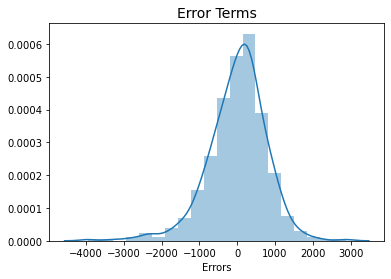

In [77]:
# Plot the hist of error term --> TRAIN

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
plt.title("Error Terms", fontsize=14)
plt.xlabel("Errors", fontsize=10);

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8231256839614738

In [ ]:
SO, the final r2 is 0.82